# EDA on Haberman Dataset

### About the Dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

###  Attributes used in the dataset 

1. Age of patient at time of operation
2. Patient's year of operation
3. Number of positive axillary nodes detected
4. Survival status (class attribute)
         A. 1= The patient survived 5 years or longer
         B. 2= The patient died within 5 year

### Objective:
##### To find whether a patient will survive a given treatment or not

# Below are the code for importing the library needed for EDA

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

# Step 1 .  This setep is to read the .csv file , and i am using Pandas to read the csv file and make it a panda dataframe . 


In [4]:
coloum_name = ["Age","Operation_year","Axil_nodes","Surv_status"]
df = pd.read_csv("haberman.csvan.csv", header = None, names = coloum_name)
print(df.count())   #1 . to count the Number of coloums Present 
print(df.head())    #2 . it  shows the head of the data set upto 5 rows
print(df.shape)     #3 . itshows the number of rows and coloums present 
print(df['Surv_status'].value_counts())  # 4 . it shows the diffrence between the number 1 and 2 , which represnts the survial of the patient of <5 years or >5 years
#4 also shows that the dataset is imbalanced dataset

Age               306
Operation_year    306
Axil_nodes        306
Surv_status       306
dtype: int64
   Age  Operation_year  Axil_nodes  Surv_status
0   30              64           1            1
1   30              62           3            1
2   30              65           0            1
3   31              59           2            1
4   31              65           4            1
(306, 4)
1    225
2     81
Name: Surv_status, dtype: int64


# Conclusion form step 1 : 
There are a tottal of 306 colums and 4 rows.
1. colum represents Age. 
2. colom represents Operation year
3. colom represents Axil nodes (Axil nodes represents the number of cancer cell present )
4. colom represnts  Survival status, which is divided into 2 parts 1 and 2 (1 as survived <5 years and 2 as survived > 5 years)
as it sates that 225 survived more than 5 years and 81 survived less than years .
5. from the 1st look of the data set what i conclude is the operation dates play no major role in Predecting the survival of the patient.

# Step 2 : Bivariate Analysis using scatter plot

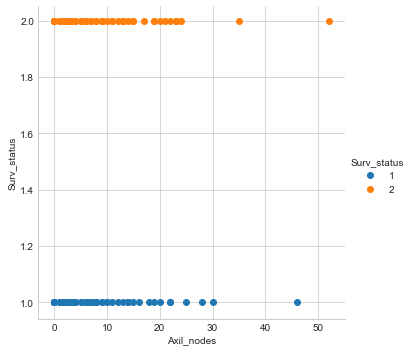

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "Surv_status",size =5) \
   .map(plt.scatter, "Axil_nodes", "Surv_status") \
   .add_legend()
plt.show()

# Conclusion form step 2 :
1. When i tried to plot the scattered plot between the diffrent features that is ,Age,Operation_year, Axil_nodes,Surv_status ,significantly there is no proper classification between any of the features , and keeping in mind the signification we are doing the EDA i.e whether a patient will survive a given treatment or not. i was unable to find any specific point to highlight that would add and prove , about the prediction. 
2. As we can see the plot above , Compared between Axil_nodes,Surv_status show no proper information to distinguish between them.

# Step 3 : Bivariate Analysis using Pair plots

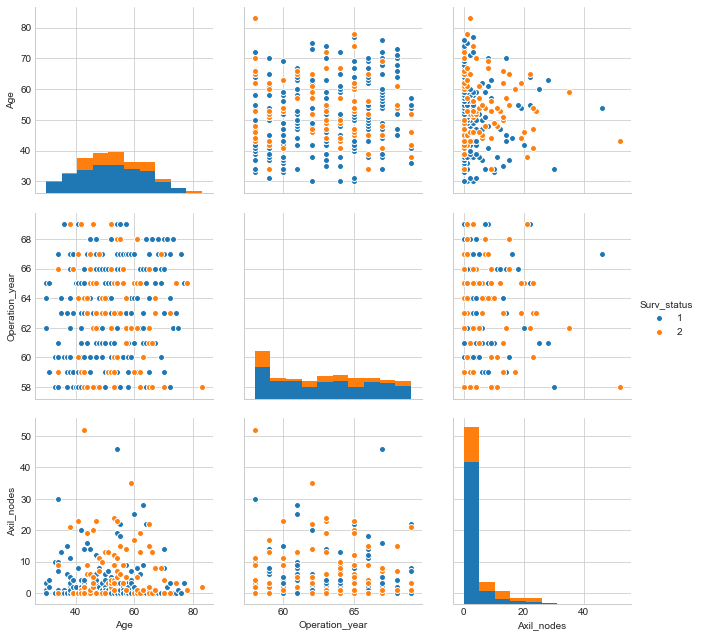

In [14]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue ='Surv_status',vars = ['Age','Operation_year' ,'Axil_nodes'], size =3)
plt.show()

### Conclusion :
1. Form the observation of the pair plots i found out that , The scatter plot between axil nodes and Operation year is comparatively better at separating the two features as copmared to the others.
2. No Concreate observation was found till now to prove that we can predict the objective . 
3. Most of the operations are been formed between the age of 35 to 70 

# Step 4 .Form the dataframe , we divide it accordingly based on patients survial or not .
#### 1. If survies the surv_status = 1 and i have marked it as ( Surv_Yes ) 
#### 2. If not the status  = 2 and i have marked it as (Surv_No)

In [54]:
Surv_Yes = df[df.Surv_status == 1]
Surv_Yes.describe()

,Age,Operation_year,Axil_nodes,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [113]:
Surv_No = df[df.Surv_status == 2]
Surv_No.describe()

,Age,Operation_year,Axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Conclusion of step 4 :
1.As i compared the mean of the Axil_nodes between the survided(1 , i.e more than 5 years) and  survided(2 , i.e less than 5 years) i came to find out an intresting thing that is the mean of survided1 is 2.791111 and the mean of survided2 is 7.456790  and the diffrence between them stands out louad at 5 Units . i. e Axil node of patient's who survived after the operation is less compare to patient who did not survived after the opeartion.

# Step 5  Univariate analysis using PDF and CDF

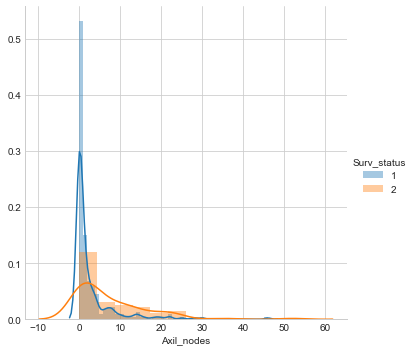

In [16]:
sns.FacetGrid(df, hue="Surv_status", size=5,) \
   .map(sns.distplot, "Axil_nodes") \
   .add_legend();
plt.show();

# Conclusion : 
1. The Figure above shows that peopel having Axil node < 5  are more likely to survive.
2. The PDF of axil_nodes for patients who survived more than 5 years is more dense near the point zero.

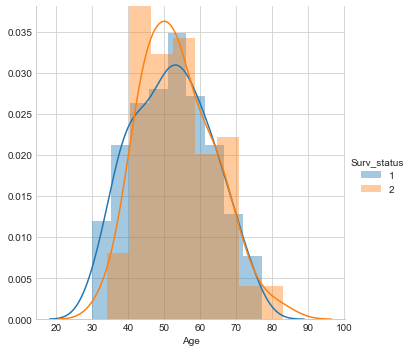

In [17]:
sns.FacetGrid(df, hue="Surv_status", size=5,) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

# Conclusion: 
1. The above figure shows that , there is a massive overlap and no proper conclusion acn be derived . 

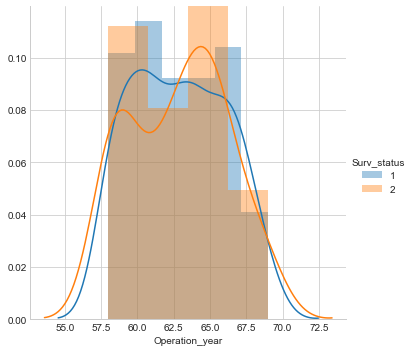

In [22]:
sns.FacetGrid(df, hue="Surv_status", size=5,) \
   .map(sns.distplot, "Operation_year") \
   .add_legend();
plt.show();

# Conclusion :
1. This figure above shows that the oprations perfomed between the year 57 to 62 were more successfull as compared to other years

# Step 6 : Analysis using the PDF and CDF  

##### PDF and CDF Comparison for who survided more than 5 years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5,0,'Axil_nodes')

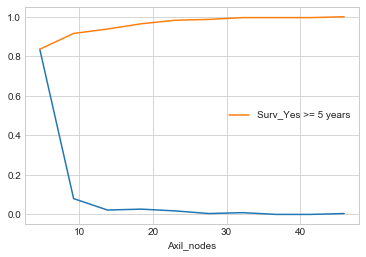

In [151]:
counts, bin_edges = np.histogram(Surv_Yes['Axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label = 'Surv_Yes >= 5 years')
plt.legend()
plt.xlabel('Axil_nodes')

# Conclusion :
1. From the above plot we can conclude that people less than 82%  have the Axil_nodes less than 5 .(from PDF)
2. 100% of the people have Axil_nodes less than 22 survive for more than 5 years(from CDF)

# PDF and CDF Comparison for who survided less than 5 years

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5,0,'Axil_nodes')

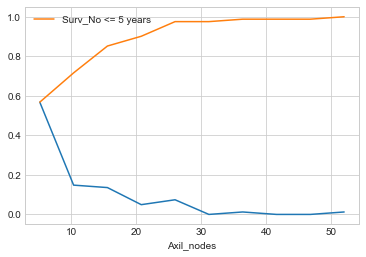

In [152]:
counts, bin_edges = np.histogram(Surv_No['Axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label = 'Surv_No <= 5 years')
plt.legend()
plt.xlabel('Axil_nodes')

# Conclusion :
1. 59%  People had  Axil_nodes less than 5 , who did not survive for 5 years(form PDF).
2.  100% People had  Axil_nodes grater  than 25  did not survive for 5 years((form CDF))


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


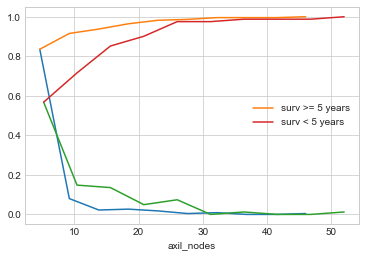

In [160]:
count1 , bin_edges1 = np.histogram(Surv_Yes['Axil_nodes'] , bins = 10 )
pdf1 = count1/sum(count1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:] , pdf1)
plt.plot(bin_edges1[1:], cdf1 , label = 'surv >= 5 years')


count2 ,bin_edges2 = np.histogram(Surv_No['Axil_nodes'] , bins=10)
pdf2 = count2/sum(count2)
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:] , pdf2)
plt.plot(bin_edges2[1:] , cdf2 , label = 'surv < 5 years')
plt.xlabel('axil_nodes')
plt.legend()
plt.show()

# Conclusion:
1.People having Axil_nodes less than 25 live more than 5 years , and people with more than 25 Axil_nodes live less than 5 years.
2.82% people who survived more than 5 years had axil_node in range b/w 0-4.5.

# CDF and PDF for age :

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


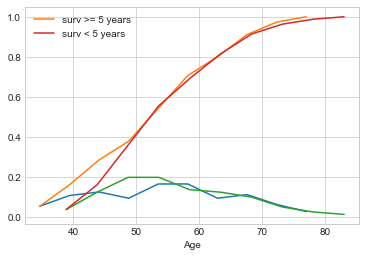

In [166]:
count1 , bin_edges1 = np.histogram(Surv_Yes['Age'] , bins = 10 )
pdf1 = count1/sum(count1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:] , pdf1)
plt.plot(bin_edges1[1:], cdf1 , label = 'surv >= 5 years')


count2 ,bin_edges2 = np.histogram(Surv_No['Age'] , bins=10)
pdf2 = count2/sum(count2)
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:] , pdf2)
plt.plot(bin_edges2[1:] , cdf2 , label = 'surv < 5 years')
plt.xlabel('Age')
plt.legend()
plt.show()

# Conslusion:
1. People having the age less than 25 to 48 has more chance of Surving more than 5 years.

# Box plot and Whiskers

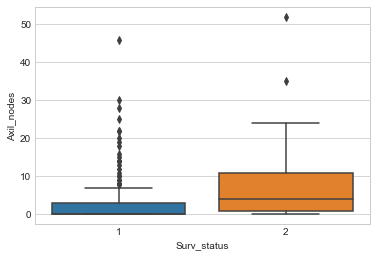

In [170]:
sns.boxplot(x='Surv_status',y='Axil_nodes', data=df)
plt.show()

# Conclusion :
1. AS there is overlap between them no proper conclusion can be derived.
2. It also shows the percantage error , that we make by the simple predection that people having Axil nodes < 5 , live more than 5 years after the operation.     

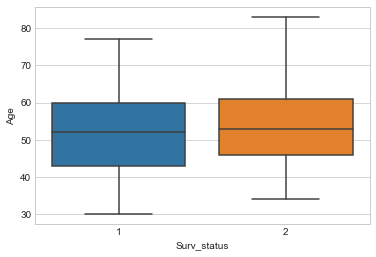

In [173]:
sns.boxplot(x='Surv_status',y='Age', data=df)
plt.show()

# Conclusion :
1. It shows the percantage of error that we make while predecting that People having the age less than 25 to 48 has more chance of Surving more than 5 years.
2. As it is overlappping at 35, as from the above graphs it can be concluded that people having less age but more Axil node cannot survive for more years.

# Violin plots

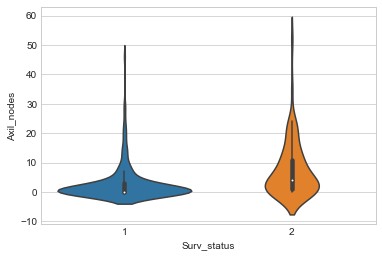

In [186]:
sns.violinplot(x="Surv_status", y="Axil_nodes", data=df, size=8)
plt.show()

# Conclison :
1. It shows that the people who survive has node density more at 0 as compared to others .

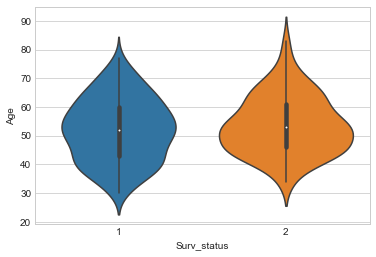

In [189]:
sns.violinplot(x='Surv_status',y='Age', data=df)
plt.show()

#### Final Conclison :
1. Patients who survived more than 5 years have lower numbers of positive auxilary nodes as compared Patients who did not survive for long.

2. The important Feature in the dataset to predect the Objective is auxilary nodes as compared to others , the second dominating feature is age of the Patients ,but i did not find any appropriate and strong ground to set age as a predective class. 

3. The Patients who survived mostly had lesser value of positive auxilary nodes that is People with auxilary nodes less than 5 had higher chances of survival

4. Most of the operations are been formed between the age of 35 to 70. 
